### 한글 깨짐 방지

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
import csv

f = open('/content/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

for row in data:
  row[4:] = map(int, row[4:])
  print(row)

['2019-01', '1호선', '150', '서울역', 927, 22, 10682, 8774, 13504, 45545, 39110, 103863, 80492, 236747, 61108, 163026, 68446, 86198, 89100, 80051, 98021, 85869, 101282, 91792, 86627, 86386, 113919, 87211, 118223, 91594, 161216, 98032, 249973, 105075, 142575, 77807, 97729, 55056, 96955, 46680, 70982, 35481, 33149, 19442, 3612, 7167, 0, 410, 0, 0, 0, 0]
['2019-01', '1호선', '151', '시청', 74, 0, 2409, 4049, 3532, 19241, 7703, 66876, 9978, 209349, 12818, 88793, 16470, 49343, 22512, 45645, 26040, 41405, 34728, 46800, 40497, 40429, 51586, 34787, 54591, 29029, 80258, 28534, 170225, 28331, 76142, 15634, 57394, 9141, 58745, 8204, 38156, 6345, 14478, 4079, 981, 1256, 3, 29, 0, 0, 0, 0]
['2019-01', '1호선', '152', '종각', 100, 8, 4409, 5105, 4593, 26969, 6733, 104259, 11028, 300081, 14563, 167611, 20165, 80474, 34617, 76633, 42088, 71920, 59893, 75678, 68149, 62408, 84211, 57607, 96197, 55889, 144446, 63459, 257735, 83206, 134259, 51603, 113555, 19039, 135586, 12188, 111743, 8286, 54264, 5560, 4886, 1722, 0,

### 아침 7시 승차 데이터 추출 -> 10번 인덱스 데이터 값 추출

In [ ]:
import csv

f = open('/content/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)
result=[]

for row in data:
  row[4:] = map(int, row[4:])
  result.append(row[10])

print(len(result))
print(result)

598
[39110, 7703, 6733, 6066, 5143, 14893, 20077, 22615, 46015, 6088, 5822, 8459, 5822, 3225, 7973, 27835, 38199, 31012, 6313, 23263, 25458, 59821, 70814, 99368, 45639, 130638, 59461, 18787, 17974, 23502, 16391, 48487, 27365, 14946, 26301, 78413, 89675, 146181, 84974, 243083, 99608, 154641, 77272, 153133, 46364, 45277, 56578, 48068, 75744, 40444, 18646, 26197, 18343, 7965, 6917, 3353, 3160, 32301, 43628, 4860, 3988, 91650, 148741, 58325, 55607, 62354, 14773, 16297, 15231, 6464, 1992, 2337, 0, 5340, 25921, 27033, 24997, 17015, 13731, 16790, 28669, 8261, 27157, 36344, 15093, 8325, 25900, 3695, 25425, 21481, 38038, 22032, 23508, 26639, 49477, 101709, 59128, 108209, 141391, 127573, 54631, 92454, 88501, 52815, 33607, 17800, 5662, 7510, 10424, 5612, 6458, 12348, 18564, 5669, 11193, 13780, 4651, 49720, 78726, 3340, 6380, 12719, 21239, 19333, 31594, 42323, 9949, 24815, 39212, 15241, 47110, 44522, 37137, 89122, 28664, 89750, 19514, 28555, 71907, 42380, 77372, 43514, 16219, 48837, 9716, 9749, 21

막대 그래프로 표현하기

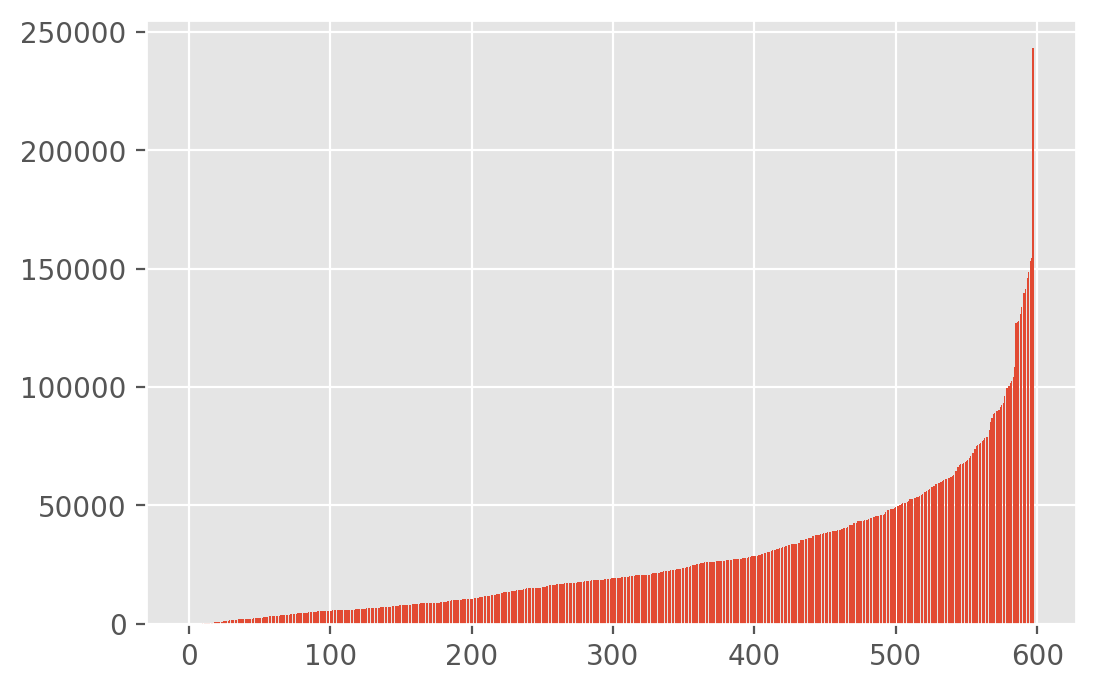

In [ ]:
import csv
import matplotlib.pyplot as plt


f = open('/content/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)
result=[]

for row in data:
  row[4:] = map(int, row[4:])
  result.append(row[10])

result.sort()
#데이터 시각화
plt.figure(dpi=200)
plt.style.use('ggplot')
plt.bar(range(len(result)),result)
plt.show()

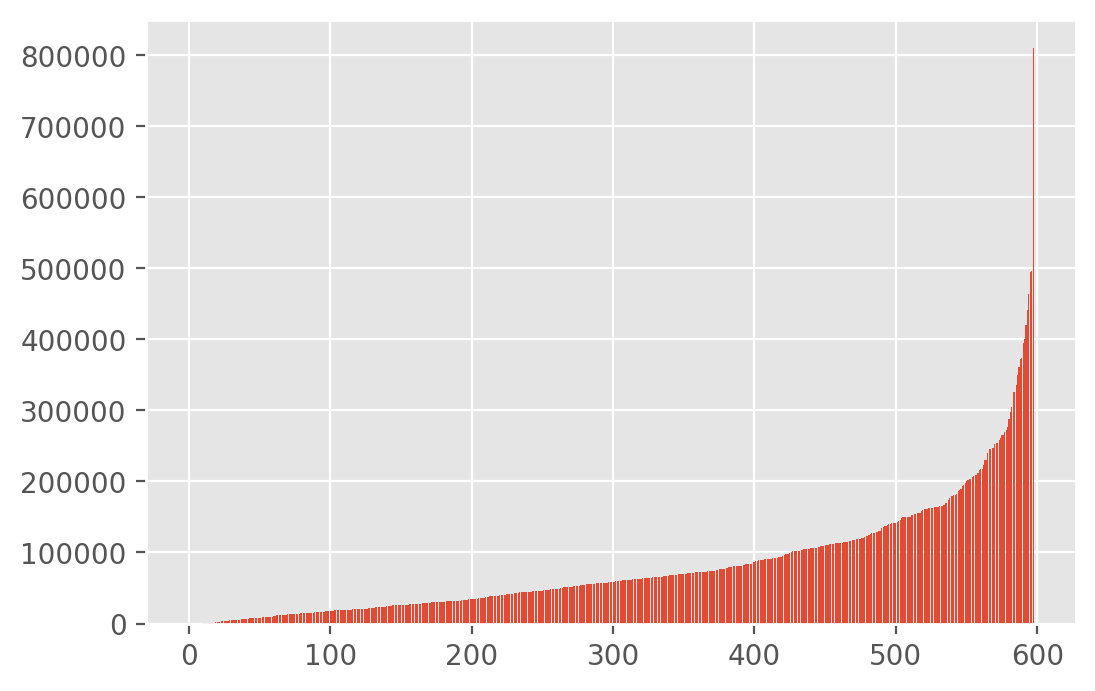

In [ ]:
import csv
import matplotlib.pyplot as plt


f = open('/content/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)
result=[] # 출근시간 (7-9시) 승차 데이터 추출 => 10,12,14 인덱스에 존재

for row in data:
  row[4:] = map(int, row[4:])
  result.append(sum(row[10:15:2]))

result.sort()
#데이터 시각화
plt.figure(dpi=200)
plt.style.use('ggplot')
plt.bar(range(len(result)),result)
plt.show()

7시부터 9시까지의 승차 인원 합계의 최댓값 찾기

In [ ]:
import csv
import matplotlib.pyplot as plt


f = open('/content/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

mx = 0
mx_station =''

for row in data:
  row[4:] = map(int,row[4:])
  if sum(row[10:15:2]) >  mx:
    mx = sum(row[10:15:2])
    mx_station = row[3] + '(' + row[1] + ')'
    
print(mx_station,mx)


신림(2호선) 809541


### 스스로 해보기

아침 7-9시 하차 인원 최대 역 찾기

In [ ]:
import csv
import matplotlib.pyplot as plt


f = open('/content/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

mx = 0
mx_station =''

for row in data:
  row[4:] = map(int,row[4:])
  if sum(row[11:16:2]) >  mx:
    mx = sum(row[11:16:2])
    mx_station = row[3] + '(' + row[1] + ')'
    
print(mx_station,mx)


강남(2호선) 984427


저녁 6-8시 승차, 하차 인원 최대 역 찾기 <br>
1) 막대그래프로 퇴근 시간대 승차 인원 표출 <br>
2) 최대 승차 역 <br>
3) 최대 하차 역

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('/content/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

mx1 = 0
mx1_station =''
mx2 = 0
mx2_station =''

for row in data:
  row[4:] = map(int,row[4:])
  if sum(row[-20:-16:2]) >  mx1:
    mx1 = sum(row[-20:-16:2])
    mx1_station = row[3] + '(' + row[1] + ')'
  if sum(row[-19:-15:2]) > mx2:
    mx2 = sum(row[-19:-15:2])
    mx2_station = row[3] + '(' + row[1] + ')'
print("저녁 6-8시 최대 승차 역 : ", mx1_station,mx1)
print("저녁 6-8시 최대 하차 역 : ", mx2_station,mx2)

'''
#데이터 시각화
plt.figure(dpi=200)
plt.style.use('ggplot')
plt.bar(mx1,mx1)
plt.show()
'''

저녁 6-8시 최대 승차 역 :  강남(2호선) 723636
저녁 6-8시 최대 하차 역 :  신림(2호선) 561336


"\n#데이터 시각화\nplt.figure(dpi=200)\nplt.style.use('ggplot')\nplt.bar(mx1,mx1)\nplt.show()\n"

### 밤 11시에 사람들이 가장 많이 타는 역은 어디일까

승차 패턴 찾기<br> 
승차 시각이 1시간씩 늦어질 때 마다 인덱스 2씩 늘어남 <br> 승차 시작 시간의 인덱스 값 4 -> 4시부터 승차가 시작(첫차)<br> 
승차 시각(t) 와 승차 인원이 적힌 인덱스(i) 관계 분석 <br>
i = 4 + (t -4) * 2


In [ ]:
import csv
import matplotlib.pyplot as plt


f = open('/content/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

mx = 0
mx_station =''
t = int(input('몇 시의 승차인원이 가장 많은 역이 궁금하세요? : '))

for row in data:
  row[4:] = map(int, row[4:])
  a = row[4 + (t-4)*2]

  if a > mx :
    mx = a
    mx_station = row[3] + '(' + row[1] + ')'

print(mx_station, mx)

몇 시의 승차인원이 가장 많은 역이 궁금하세요? : 9
신림(2호선) 211286


### 시간대 별 최대 승차 역 이름 및 승차 인원 막대 그래프로 표현하기

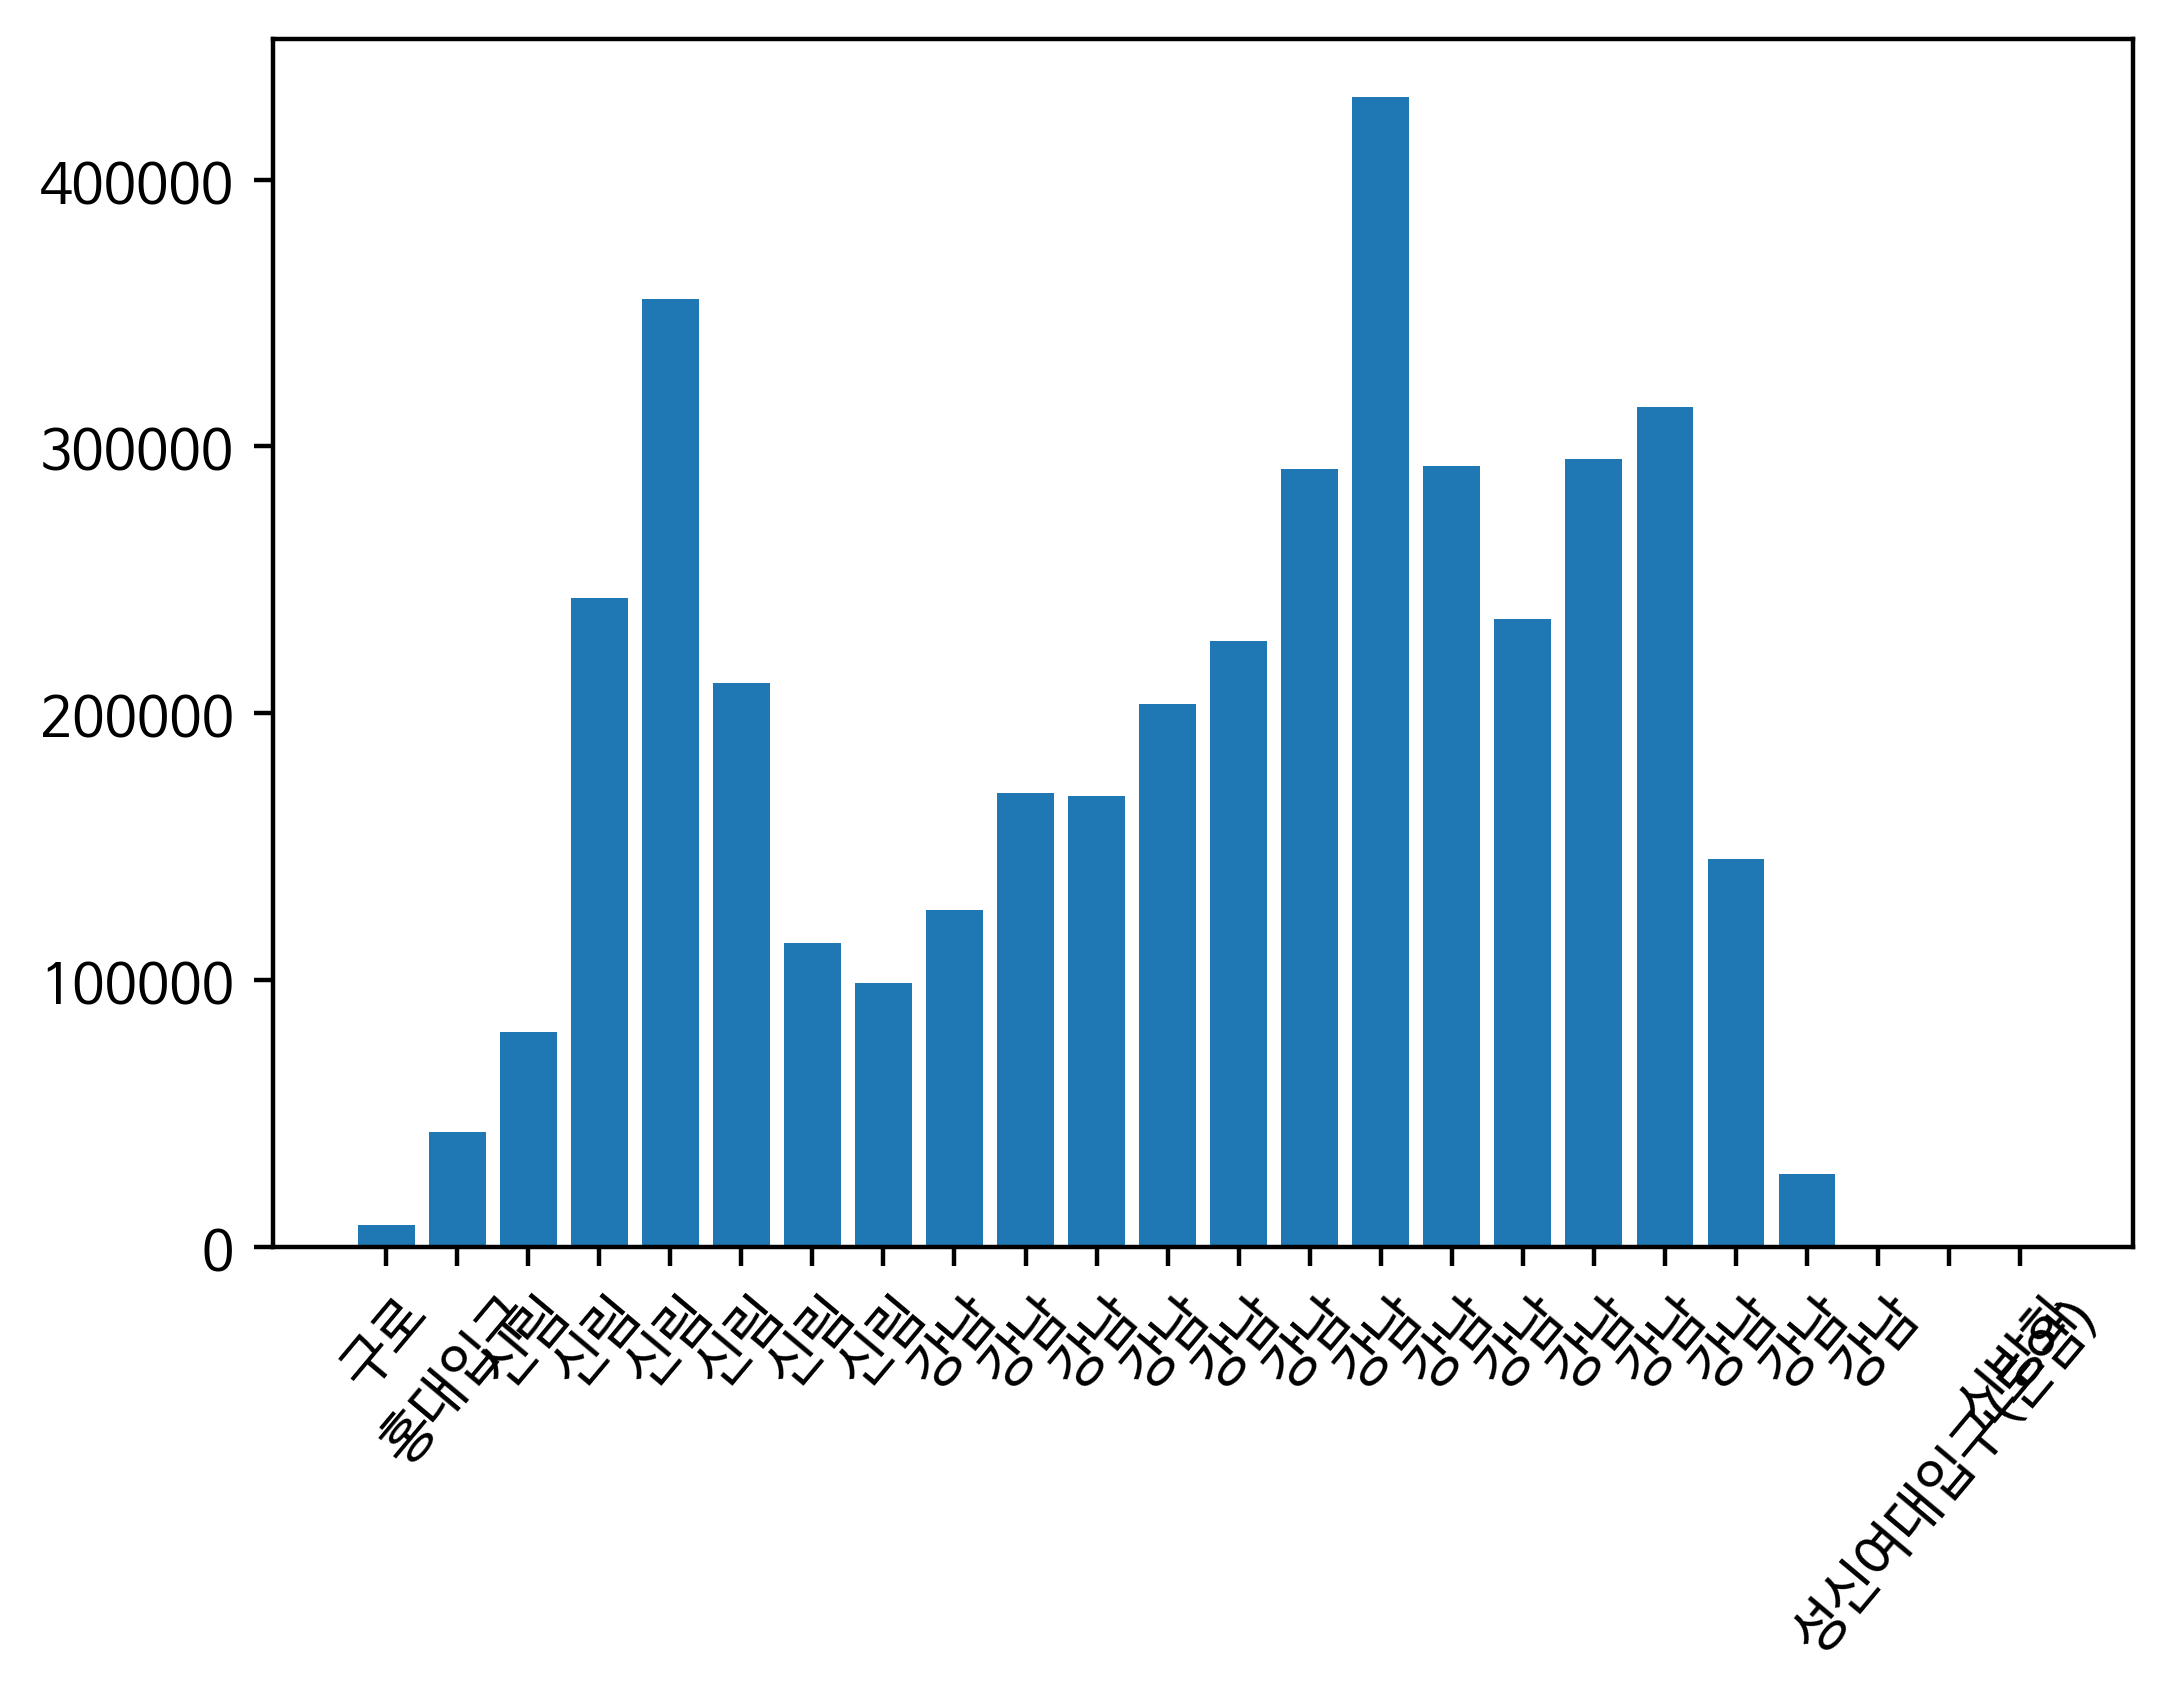

In [ ]:
import csv
import matplotlib.pyplot as plt


f = open('/content/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

mx = [0] * 24
mx_station =[''] * 24

for row in data:
  row[4:] = map(int, row[4:])
  for j in range(24):
    a = row[j*2+4] 
    # 시간대별 패턴 i = j * 2 + 4 (j는 0 ~ 23까지) -> 시작 인덱스 4

    if a > mx[j] :
      mx[j] = a
      mx_station[j] = row[3]

#print(mx_station)
#print(mx)

plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.figure(figsize=(20,12),dpi=100)
plt.bar(range(24),mx)
plt.xticks(range(24),mx_station,rotation=50)
plt.show()

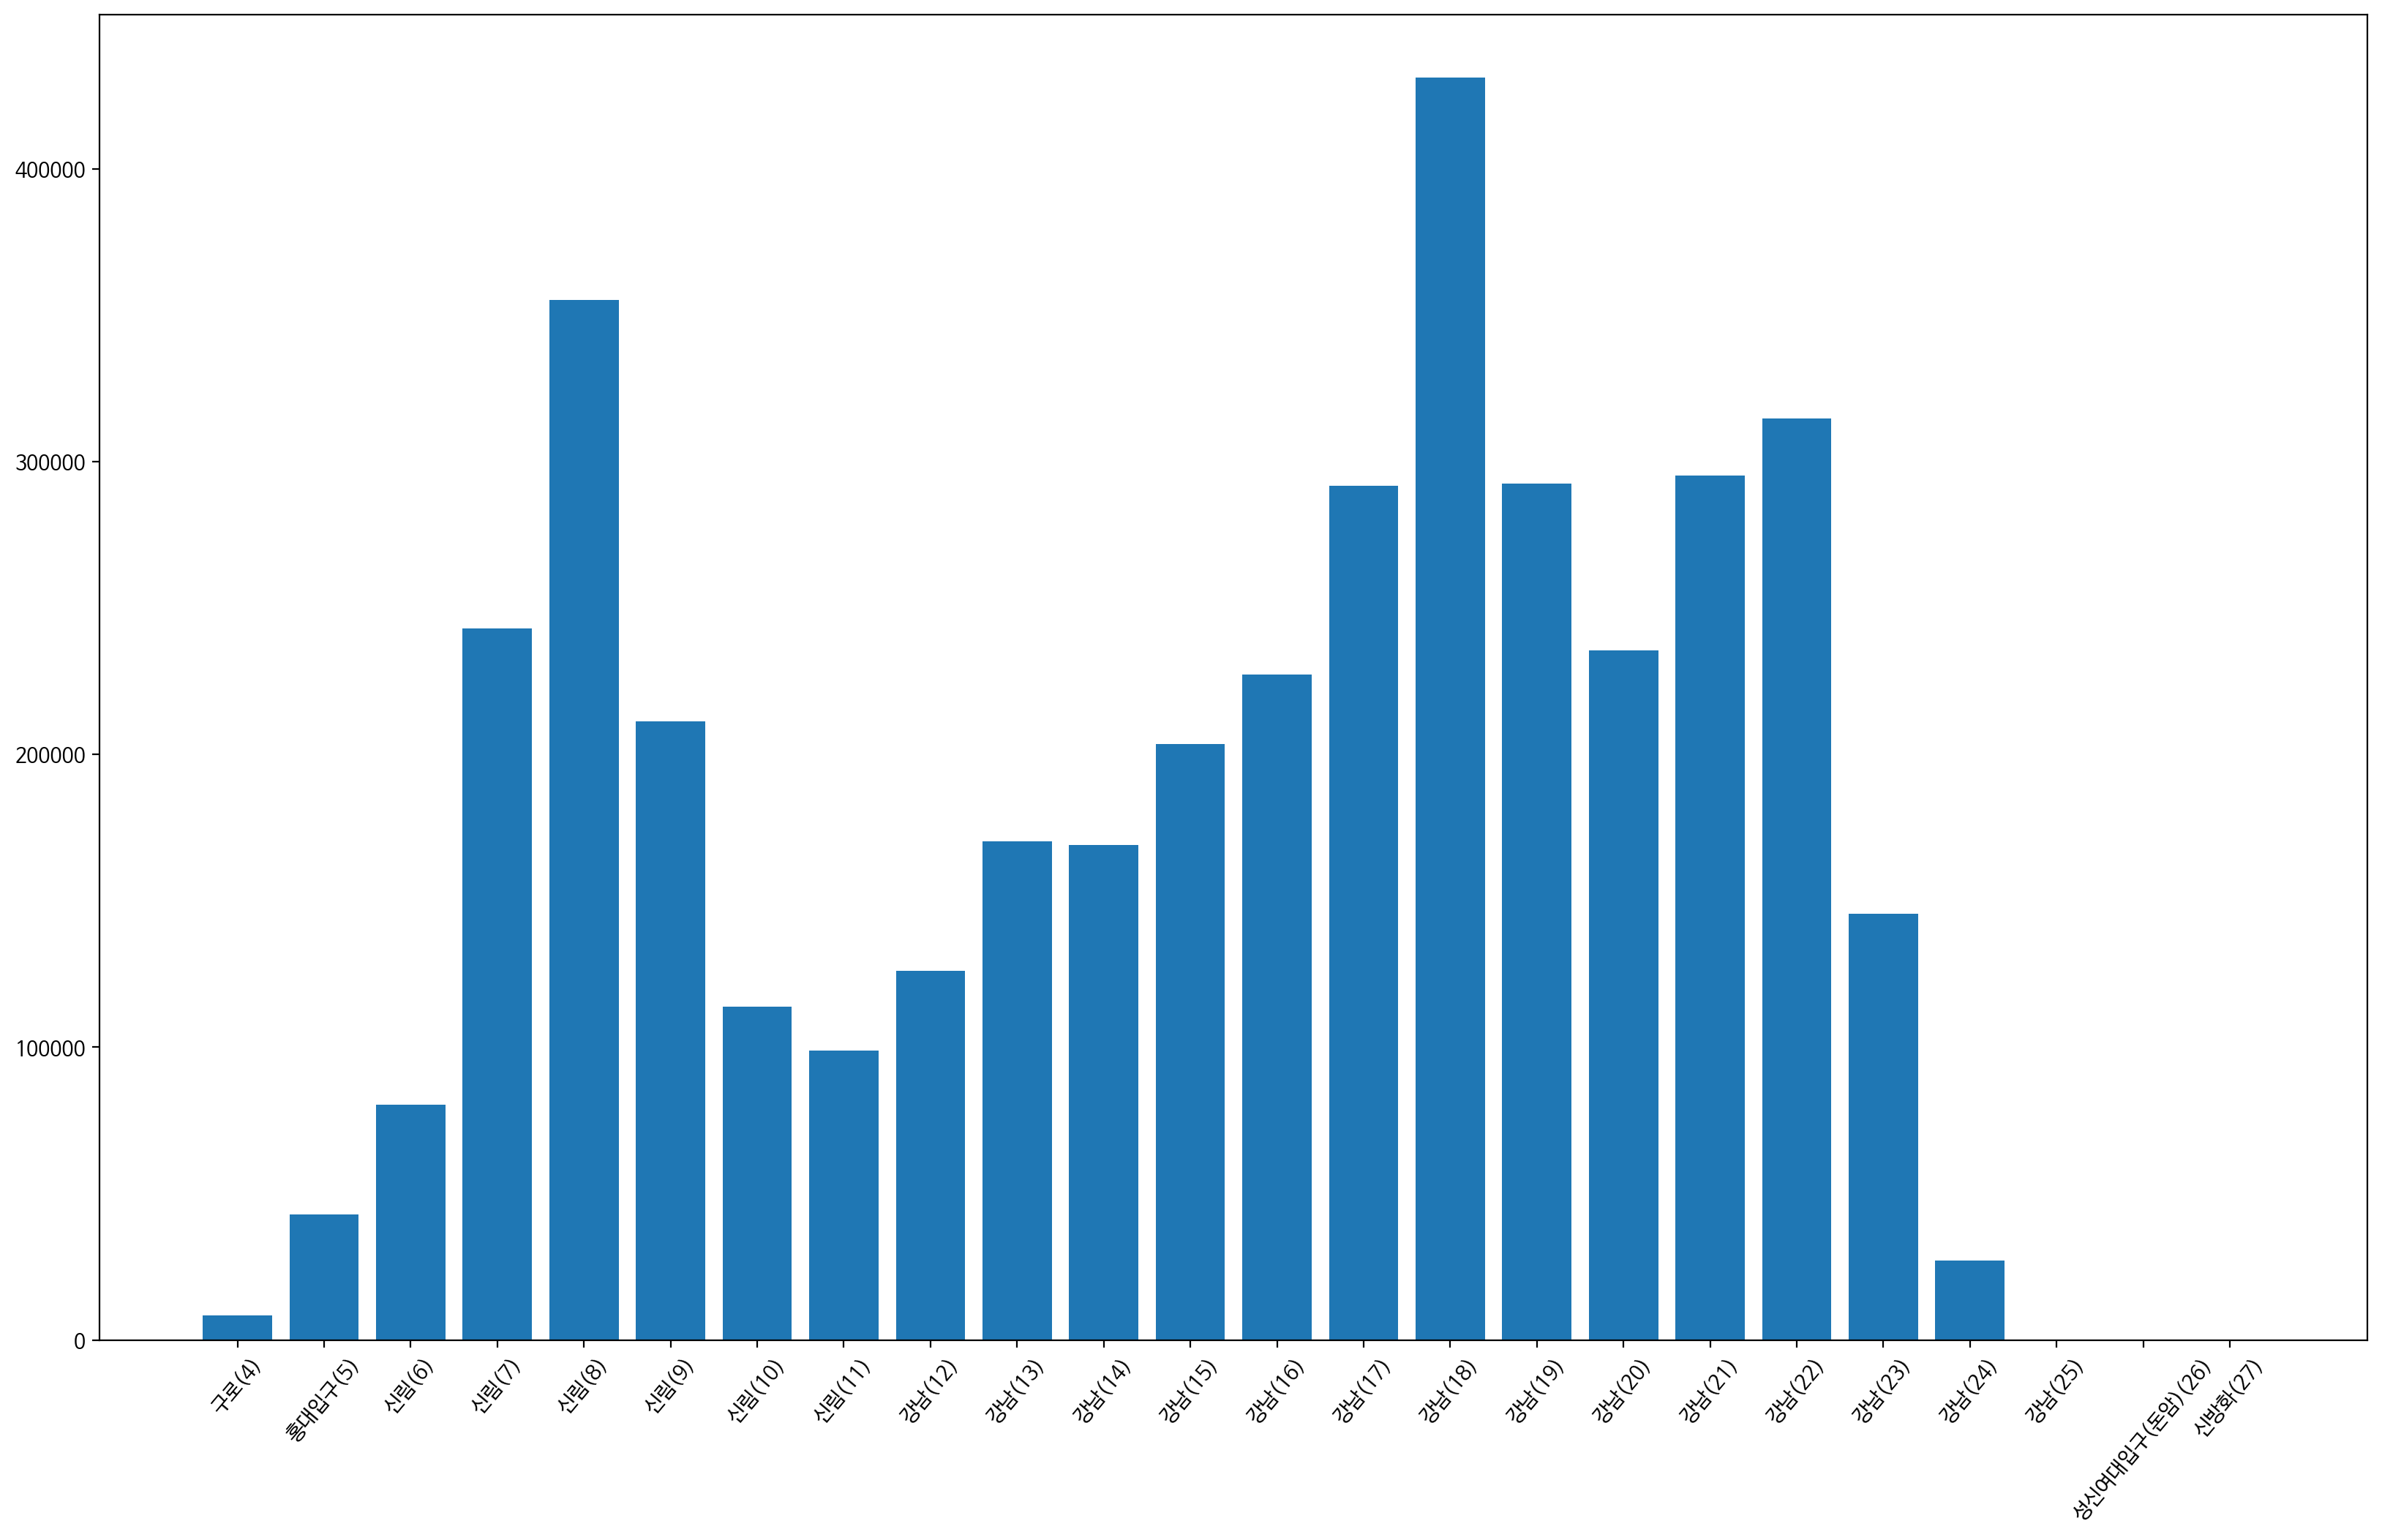

In [ ]:
import csv
import matplotlib.pyplot as plt


f = open('/content/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

mx = [0] * 24
mx_station =[''] * 24

for row in data:
  row[4:] = map(int, row[4:])
  for j in range(24):
    a = row[j*2+4] 
    # 시간대별 패턴 i = j * 2 + 4 (j는 0 ~ 23까지) -> 시작 인덱스 4

    if a > mx[j] :
      mx[j] = a
      mx_station[j] = row[3] +'('+str(j+4)+')'


plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.figure(figsize=(20,12),dpi=100)
plt.bar(range(24),mx)
plt.xticks(range(24),mx_station,rotation=50)
plt.show()

### 시간대 별 최대 하차 역 이름 및 히차 인원 막대 그래프로 표현하기

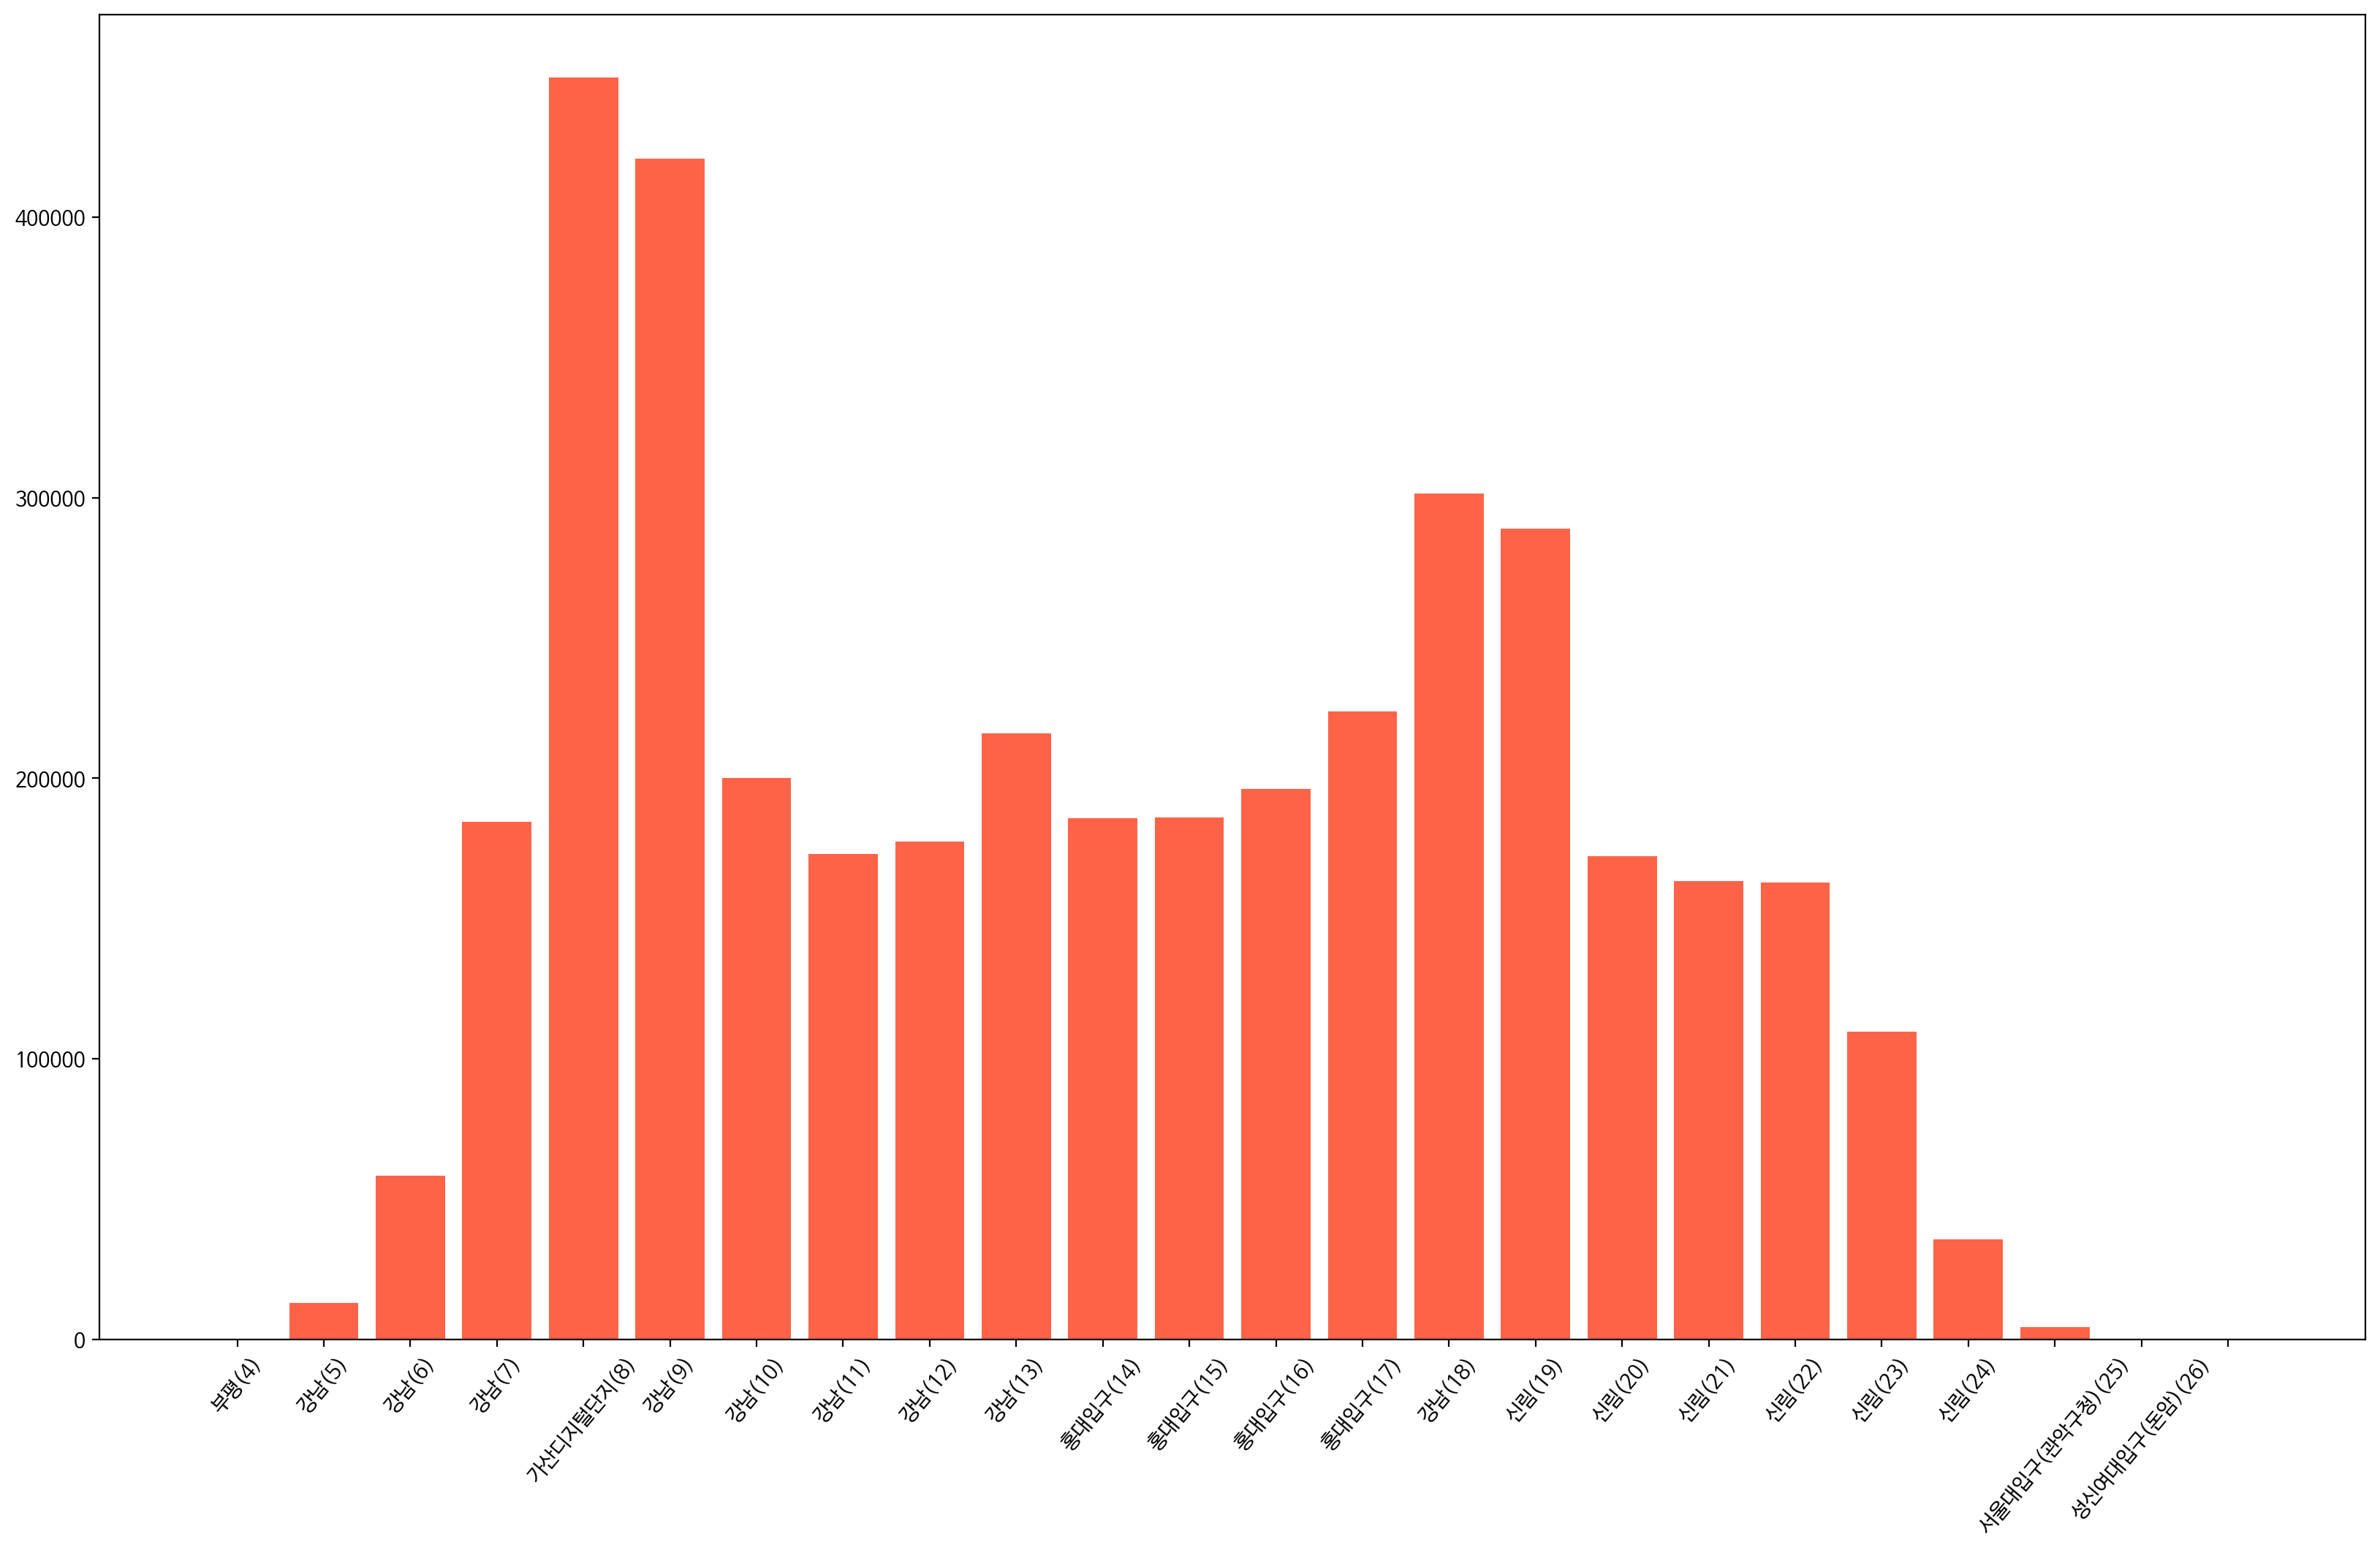

In [ ]:
import csv
import matplotlib.pyplot as plt


f = open('/content/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

mx = [0] * 24
mx_station =[''] * 24

for row in data:
  row[4:] = map(int, row[4:])
  for j in range(24):
    b = row[j*2+5] 
    # 시간대별 패턴 i = j * 2 + 5 (j는 0 ~ 23까지) -> 시작 인덱스 5

    if b > mx[j] :
      mx[j] = b
      mx_station[j] = row[3] +'('+str(j+4)+')'


plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.figure(figsize=(20,12),dpi=100)
plt.bar(range(24),mx,color='tomato')
plt.xticks(range(24),mx_station,rotation=50)
plt.show()

### 모든 지하철역에서 시간대 별 승하차 인원 구하기

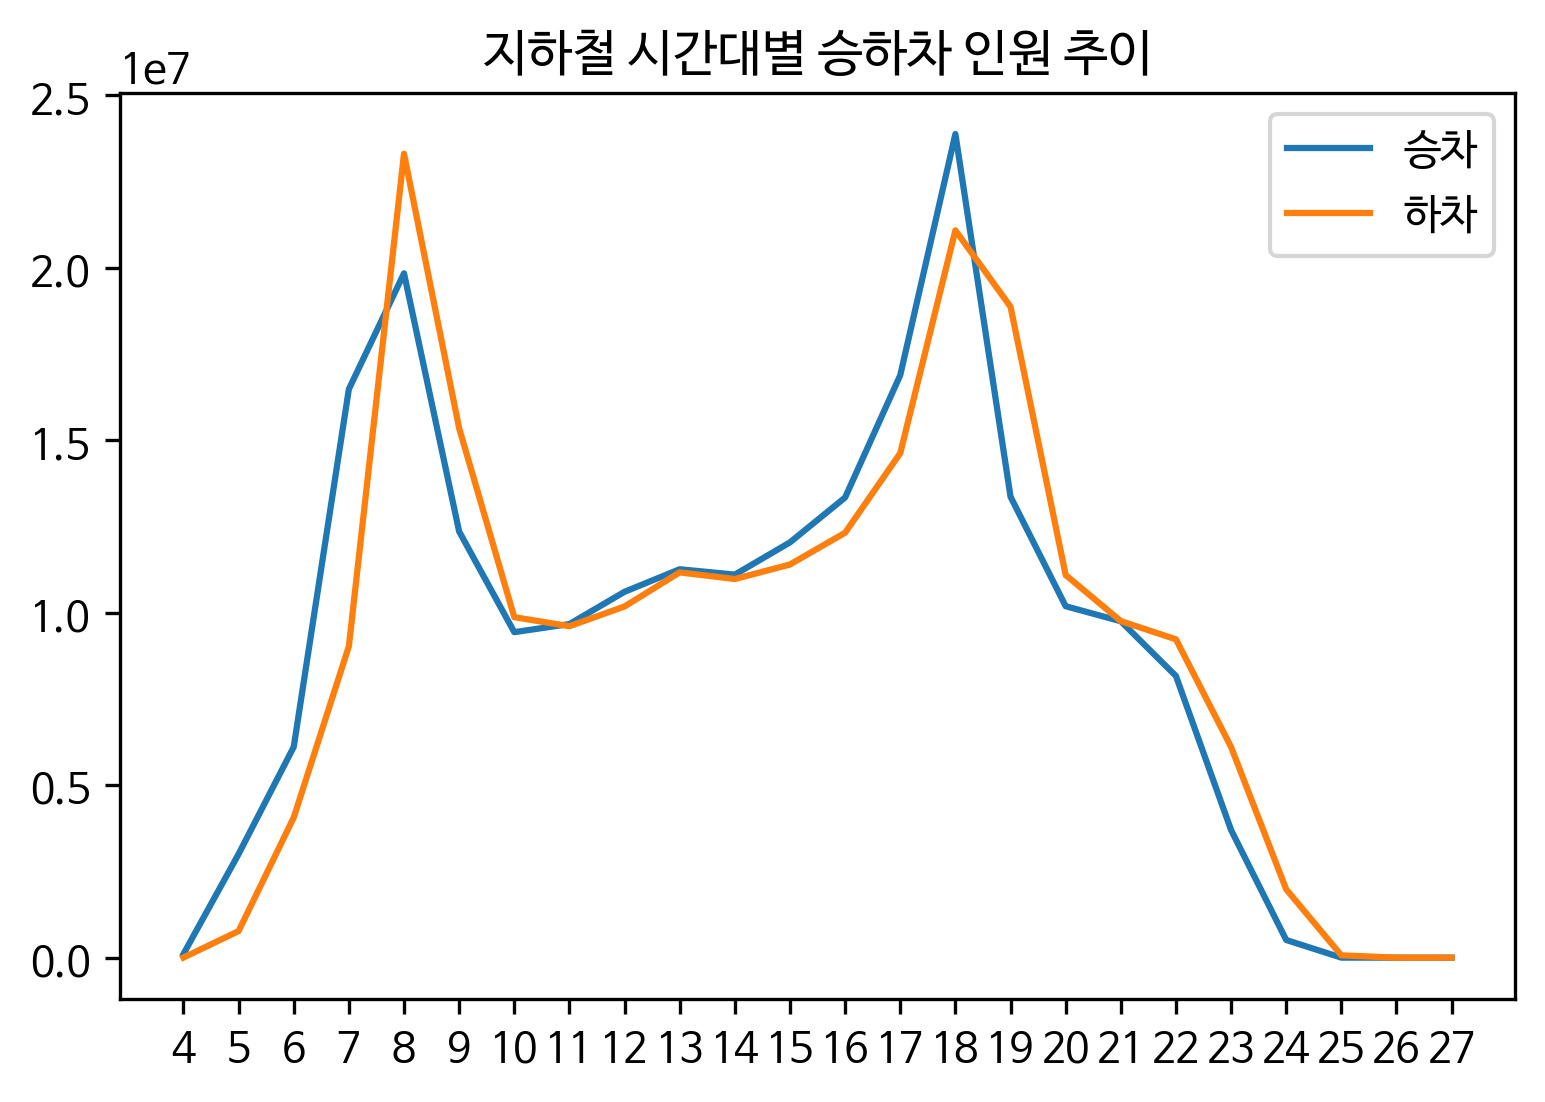

In [ ]:
import csv
import matplotlib.pyplot as plt


f = open('/content/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

s_in = [0] * 24
s_out = [0] *24

for row in data:
  row[4:] = map(int, row[4:])
  for i in range(24):
    s_in[i] += row[4 + i*2] #승차
    s_out[i] += row[5+ i*2] #하차


plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.figure(dpi=150)

plt.title('지하철 시간대별 승하차 인원 추이')
plt.plot(s_in, label = '승차')
plt.plot(s_out, label = '하차')
plt.legend()
plt.xticks(range(24),range(4,28))
plt.show()